# Experiment 1

Experiment 1 is about to train two models, baseline and hard negative, to inspect the initial performance.

* [Training](#Training)
* [Evaluating](#Evaluating)
* [Plots](#Plots)

In [2]:
import sys
sys.path.append('..')

## Training

In [1]:
%run -i 'train.py' --dataset_name 'docpairs' --train_name 'baseline_triples' --out_dir 'model_base' --batch_size 16

/home/jht412/anaconda3/envs/py310_20230225/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5.py:164: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


  0%|          | 0/100000.0 [00:00<?, ?it/s]

In [2]:
%run -i 'train.py' --dataset_name 'docpairs' --train_name 'new_triples' --out_dir 'model_new' --batch_size 16

/home/jht412/anaconda3/envs/py310_20230225/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5.py:164: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


  0%|          | 0/100000.0 [00:00<?, ?it/s]

## Evaluating

In [6]:
%run -i '../evaluate.py' --output_name '20230727' --batch_size 16

06:25:33.701 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1.9 GiB of memory would be required.
06:25:35.154 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1.9 GiB of memory would be required.


monoT5: 100%|████████████████████████| 12078/12078 [09:19<00:00, 21.57batches/s]


### Plots

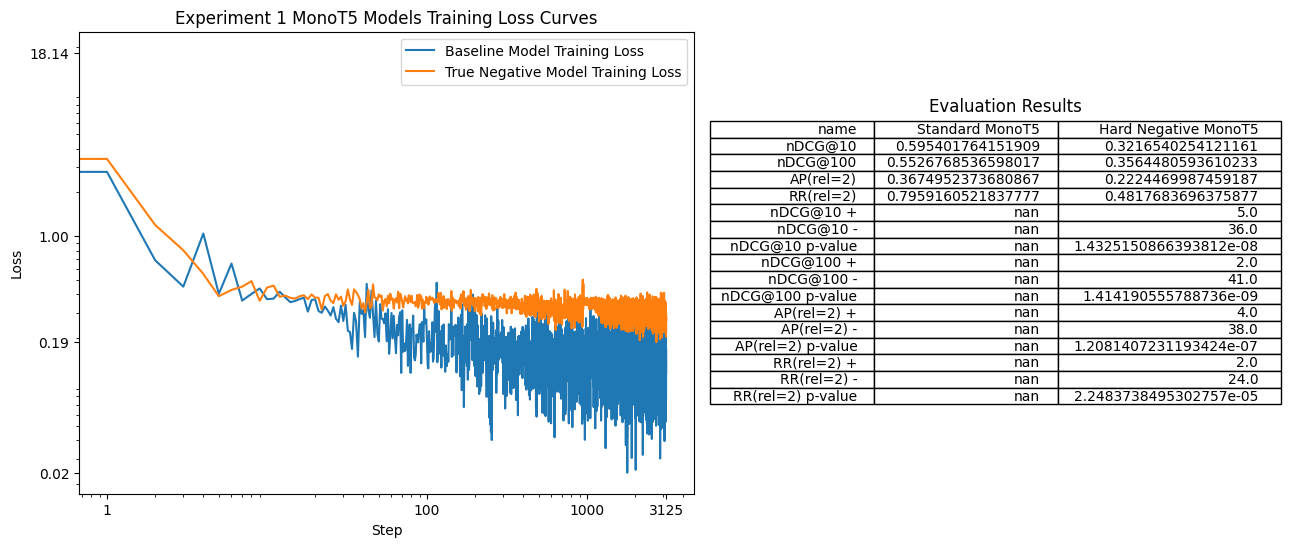

In [205]:
# Original code snip

from utils import get_curves

result_df = pd.read_csv(f'results/test-2019_20230719_32.csv', index_col=0)
get_curves('model_base/logs.json', 'model_new/logs.json', result_df, 'Experiment 1 MonoT5 Models Training')

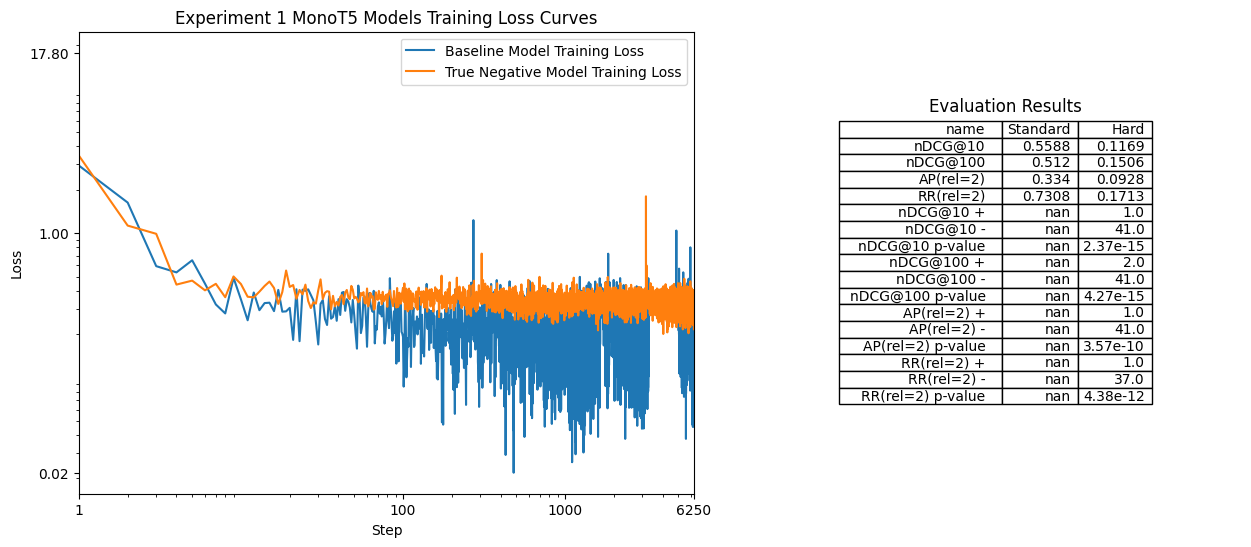

In [7]:
# Current code for plotting

from utils import get_curves
import pandas as pd

result_df = pd.read_csv(f'results/test-2019_20230727_16.csv', index_col=0)
logs_paths = [
    '../Experiment_1/model_base', 
    '../Experiment_1/model_new'
]
labels = [
    'Baseline Model Training Loss',
    'True Negative Model Training Loss'
]
get_curves(logs_paths, result_df, 'Experiment 1 MonoT5 Models Training', labels)